# LIWC를 활용한 거짓의견 분석 프로젝트

## 개요
본 프로젝트는 [1]"Oh, Yu Won, and Chong Hyun Park. "Machine cleaning of online opinion spam: Developing a machine-learning algorithm for detecting deceptive comments." American behavioral scientist 65.2 (2021): 389-403." 의 후속 연구로써 인터넷에서 작성되는 글 중 봇이 작성한 텍스트 혹은 거짓 정보를 포함하고 있는 텍스트(이하 거짓의견)와 일반 유저가 작성한 진실성 있는 텍스트(이하 진짜의견) 간 언어학적 차이를 분석하는 프로젝트입니다.

### Data  
전체 데이터는 총 8개의 issue로 구성되어있으며, 각 issue에는 가짜의견과 진짜의견이 구분된 텍스트 데이터가 포함되어 있습니다. 본 프로젝트에서 사용한 데이터는 전체 issue중 하나의 이슈에서 소수의 샘플링한 데이터를 사용하였습니다. 샘플 데이터 중 거짓 의견(Fake comment)은 113개 진짜 의견(True comment)은 108개로 구성되어 있으며, 한국어 텍스트로 구성되어 있습니다. 데이터 수집 및 전처리 방법은 이전 연구논문[1]을 따릅니다.

### Analysis  
수집한 텍스트를 언어학적으로 분석하기 위해 LIWC(Linguistic Inquiry and Word Count) Tool을 이용하였습니다. 이 tool은 word-level 수준에서 단어의 품사와 의미 그리고 감정분석 등을 할 수 있습니다. 하지만, LIWC는 English만 지원하기 때문에, 한국어 텍스트 데이터를 처리하기 위해서 Google Translate API를 사용하여 영어로 번역 후 분석을 진행하였습니다.(참고사항 : LIWC 분석 결과 table에 텍스트도 포함되기 때문에, github repository의 data는 LIWC 분석 결과만 포함되어 있습니다.)

가짜의견과 진짜의견 각각을 독립적으로 LIWC tool을 이용하여 분석하였으며, 총 2개의 테이블이 분석 결과로 나오게 되었으며 각각 (113x120),(108x120) 크기의 column으로 구성된 2개의 table이 분석 결과로 나오게 됩니다 (size = (113,108) x 2 x 120). 분석 목표는 가짜의견과 진짜의견이 각 column에서 얼마나 연관성이 있는지 분석하여, 각 의견마다 상대적으로 연관성이 큰 column 요소를 찾는 것 입니다. 분석을 위해 PCA 및 naive bayes등의 머신러닝 방법도 사용하였으며,특히 본 jupyter notebook에서는 [2]"Shin, Youjin, and Simon S. Woo. "What is in your password? analyzing memorable and secure passwords using a tensor decomposition." The World Wide Web Conference. 2019." 논문에서 제시한 Parafac2 decomposition을 이용한 분석 방법을 구현하였습니다.

구현은 크게 (1) Remove Zero Variance (2) Feature Normalization (3) Parafac2 Decomposition을 이용한 분석으로 3가지 파트로 구성됩니다. 이 중 전처리에 해당하는 부분은 (1) 과 (2) 이며, 분석 part는 (3)입니다. 각 파트에 대해 간단히 정리하면 다음과 같습니다.

**(1) Remove Zero Variance**  
분산이 작은 경우에는 분석할만한 데이터가 적다고 판단하여 해당 column은 분석에서 제외하였습니다.

**(2) Feature Normalization**  
각 column마다 scale이 다르기 때문에 Normalization을 적용하였습니다. 이때 사용한 기법은 Min-Max Normalization을 사용하였습니다.

**(3) Parafac2 Decomposition을 이용한 분석**  
Tensorly에서 제공하는 Parafac2 클래스를 이용하여 decomposition을 수행하였습니다. 각 거짓의견과 진짜의견을 하나의 matrix로 합친 이후에 decomposition을 수행하였습니다. 수행 방법은 참고한 [2] 논문과 동일하게 구현하였습니다. original matrix와 tensor decomposition 이후 다시 reconstruction한 결과 거의 비슷해야 한다고 생각하여 Reconstruction ratio와 Reconstruction error 값을 각 rank마다 구하여 최적의 rank값을 설정하였습니다. 이후 설정한 rank를 이용하여 decomposition을 수행하였습니다. 분해된 텐서를 이용하여 가짜의견과 진짜의견 간 strength를 구하였으며, 이때 지표는 Euclidean distance를 이용하였습니다.

### Result
가짜의견과 진짜의견간 strength를 수치적으로 구한 결과를 이용하여 결과해석을 진행합니다. strength가 작을수록 거리가 가깝다는 의미이므로 더욱 강한 연관성이 있다고 해석할 수 있습니다. 두 집간간의 strength 차이를 이용하여 평균과 분산을 구하여 일정 threshold 이상인 차이가 나는 column에 대해서 유의미한 차이가 있다고 판단하였습니다. 본 프로젝트에서는 적은 수의 샘플 데이터를 이용하여 구현하였기 때문에, 실제 데이터와 차이가 있을 수 있습니다. 본 분석 방법을 활용하여 각 issue 별로 언어학적 차이를 분석할 수 있으며, 전체 issue에 대해 공통적으로 나타나는 특징에 대해서도 분석할 수 있습니다. 

## 더욱 자세한 설명
- 프로젝트와 관련된 자세한 설명(notion) : https://www.notion.so/Fake-Comment-3d1b3ff5fcbe4adca5a2b3799af3e4c6?pvs=4  
- 참고한 논문[2] 정리 글(개인 Blog) : https://kaya-dev.tistory.com/19

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
#issue 번호 지정(ex : 1,2,3,...)
issue_idx = 1

#파일 목록 가져오기
file_list = os.listdir("./data/issue"+str(issue_idx))
print("파일 목록 : ",file_list)

#issue idx 안에 들어있는 데이터 파일 경로 
FILE_PATH = "./data/issue"+str(issue_idx)+'/'

파일 목록 :  ['.ipynb_checkpoints', 'fake_comments_issue_1_trans - LIWC Analysis.csv', 'true_comments_issue_1_trans - LIWC Analysis.csv']


## Data 1. Negative Data

In [3]:
#데이터 불러오기
fake_1 = pd.read_csv(FILE_PATH + 'fake_comments_issue_1_trans - LIWC Analysis.csv')
true_1 = pd.read_csv(FILE_PATH +'true_comments_issue_1_trans - LIWC Analysis.csv')

In [4]:
print("Fake 데이터 갯수 : ", len(fake_1))
print("True 데이터 갯수 : ", len(true_1))

Fake 데이터 갯수 :  113
True 데이터 갯수 :  108


In [5]:
#데이터 살펴보기
fake_1.head()

,ColumnID,Text,Segment,WC,Analytic,Clout,Authentic,Tone,WPS,BigWords,...,assent,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP
0,A,Koreans only do bad things when they come to K...,1,66,5.32,23.94,61.28,1.00,16.50,13.64,...,0.00,0.0,0.0,15.15,6.06,6.06,0.00,0.00,1.52,1.52
1,A,"If you look these days, you can see a lot of ...",1,73,15.16,25.32,97.30,1.00,14.60,20.55,...,0.00,0.0,0.0,17.81,9.59,5.48,0.00,0.00,1.37,1.37
2,A,Although the Korean-Chinese are superficially ...,1,68,42.31,66.03,57.19,1.00,22.67,25.00,...,0.00,0.0,0.0,10.29,4.41,4.41,0.00,0.00,0.00,1.47
3,A,"Yes, there are a lot of Korean-Chinese people...",1,62,24.16,31.06,95.40,1.00,12.40,16.13,...,1.61,0.0,0.0,25.81,8.06,8.06,0.00,0.00,6.45,3.23
4,A,Koreans should withdraw from Korea. All powerf...,1,53,91.90,92.68,1.24,5.02,8.83,22.64,...,0.00,0.0,0.0,26.42,5.66,7.55,1.89,5.66,0.00,5.66


In [6]:
print("[가짜의견 예시]")
print(fake_1['Text'][0])
print('-'*100)
print("[진짜의견 예시]")
print(true_1['Text'][0])

[가짜의견 예시]
Koreans only do bad things when they come to Korea. They come to Korea to earn money and do bad things, which makes the social atmosphere cloudy and insecure. Koreans only see damage, but they can't leave it alone. If you watch TV or read the newspaper, there are many Korean-Chinese who have committed violent crimes, and many people have no choice but to be dissatisfied.
----------------------------------------------------------------------------------------------------
[진짜의견 예시]
It may be a prejudice against Korean-Chinese, but the fear grows as I come across the word Korean-Chinese easily in violent crime articles. Because all crimes are wrong, I think the punishment should be tougher. The law must be overhauled so that no more people die unjustly in a brutal way!!


## Preprocessing 1 : Removing Near Zero Variance features 

- 분산이 작은 feature를 제거하는 작업을 진행합니다. '작다'는 기준은 분산이 1 미만인 경우로 설정하였습니다.
- 추가적으로 사분위수 중 2분위수를 이용하여 해당 값이 0인 경우도 feature에서 제외하였습니다.

In [7]:
#describe함수를 이용하여 통계량을 표현
fake_sta = fake_1.describe()

In [8]:
fake_sta.T.to_excel("fake_sample.xlsx",encoding = 'utf8')#저장용

In [9]:
fake_sta

,Segment,WC,Analytic,Clout,Authentic,Tone,WPS,BigWords,Dic,Linguistic,...,assent,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP
count,113.0,113.000000,113.000000,113.00000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,...,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,1.0,65.371681,48.397080,44.46823,51.363894,5.900088,16.327522,19.105044,90.690088,73.273894,...,0.038850,0.099558,0.038230,19.144513,7.416283,5.248053,0.482566,0.451681,1.948850,3.599204
std,0.0,17.190215,30.482668,30.79183,34.111948,12.652721,6.152351,5.893940,4.776511,6.054609,...,0.301039,0.434195,0.232806,6.543823,4.512775,2.781440,1.187047,1.467881,2.222214,2.174808
min,1.0,29.000000,1.000000,1.00000,1.000000,1.000000,6.330000,5.130000,75.000000,55.560000,...,0.000000,0.000000,0.000000,6.490000,1.520000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,57.000000,19.570000,16.05000,19.260000,1.000000,12.330000,14.810000,88.160000,69.700000,...,0.000000,0.000000,0.000000,14.710000,4.440000,3.230000,0.000000,0.000000,0.000000,1.750000
50%,1.0,65.000000,47.650000,40.06000,52.190000,1.000000,15.000000,18.280000,91.800000,73.580000,...,0.000000,0.000000,0.000000,18.180000,6.560000,4.920000,0.000000,0.000000,1.450000,3.230000
75%,1.0,73.000000,73.360000,66.03000,86.070000,5.020000,20.000000,22.410000,94.120000,76.740000,...,0.000000,0.000000,0.000000,23.080000,8.330000,6.900000,0.000000,0.000000,3.080000,5.410000
max,1.0,137.000000,99.000000,99.00000,99.000000,89.280000,40.000000,34.480000,100.000000,88.760000,...,2.780000,2.500000,1.520000,48.480000,30.910000,16.670000,6.900000,9.380000,8.330000,11.540000


In [10]:
fake_sta = fake_sta.T

In [11]:
fake_sta.head(10)

,count,mean,std,min,25%,50%,75%,max
Segment,113.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.00
WC,113.0,65.371681,17.190215,29.00,57.00,65.00,73.00,137.00
Analytic,113.0,48.397080,30.482668,1.00,19.57,47.65,73.36,99.00
Clout,113.0,44.468230,30.791830,1.00,16.05,40.06,66.03,99.00
Authentic,113.0,51.363894,34.111948,1.00,19.26,52.19,86.07,99.00
Tone,113.0,5.900088,12.652721,1.00,1.00,1.00,5.02,89.28
WPS,113.0,16.327522,6.152351,6.33,12.33,15.00,20.00,40.00
BigWords,113.0,19.105044,5.893940,5.13,14.81,18.28,22.41,34.48
Dic,113.0,90.690088,4.776511,75.00,88.16,91.80,94.12,100.00
Linguistic,113.0,73.273894,6.054609,55.56,69.70,73.58,76.74,88.76


In [12]:
def get_feature_name(frame):
    feature_names = []
    #각 feature마다 rotation
    for idx in range(len(frame)):
        #하나의 feature에 대해
        feature = frame.iloc[idx]
        #std가 1이 이상이며, 2분위수의 값이 0인 아닌 경우만 포함
        if int(feature['std']) >= 1 and int(feature['50%']) != 0 :
            feature_names.append(feature.name)
    return feature_names

In [13]:
fake_remove_sta = get_feature_name(fake_sta)
print("필터링 후 feature : ",fake_remove_sta)

필터링 후 feature :  ['WC', 'Analytic', 'Clout', 'Authentic', 'Tone', 'WPS', 'BigWords', 'Dic', 'Linguistic', 'function', 'pronoun', 'ppron', 'i', 'they', 'ipron', 'det', 'article', 'prep', 'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj', 'quantity', 'Drives', 'power', 'Cognition', 'cogproc', 'insight', 'cause', 'discrep', 'tentat', 'differ', 'Affect', 'tone_neg', 'emotion', 'emo_neg', 'emo_anger', 'Social', 'socbehav', 'socrefs', 'Culture', 'ethnicity', 'Lifestyle', 'Physical', 'allure', 'Perception', 'motion', 'space', 'time', 'focuspast', 'focuspresent', 'AllPunc', 'Period', 'Comma', 'Apostro', 'OtherP']


In [14]:
print("기존 fake feature의 갯수:",len(fake_sta))
print("전처리 후 fake feature 갯수:",len(fake_remove_sta))

기존 fake feature의 갯수: 118
전처리 후 fake feature 갯수: 58


In [15]:
#전처리 후 feature만 포함하는 dataframe
fake_1 = fake_1[fake_remove_sta]

In [16]:
fake_1.describe()

,WC,Analytic,Clout,Authentic,Tone,WPS,BigWords,Dic,Linguistic,function,...,motion,space,time,focuspast,focuspresent,AllPunc,Period,Comma,Apostro,OtherP
count,113.000000,113.000000,113.00000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,...,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,65.371681,48.397080,44.46823,51.363894,5.900088,16.327522,19.105044,90.690088,73.273894,58.429115,...,1.692212,8.329735,2.384425,2.274956,7.544779,19.144513,7.416283,5.248053,1.948850,3.599204
std,17.190215,30.482668,30.79183,34.111948,12.652721,6.152351,5.893940,4.776511,6.054609,5.889625,...,1.739598,4.259858,2.464299,2.859402,2.902712,6.543823,4.512775,2.781440,2.222214,2.174808
min,29.000000,1.000000,1.00000,1.000000,1.000000,6.330000,5.130000,75.000000,55.560000,40.910000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.490000,1.520000,0.000000,0.000000,0.000000
25%,57.000000,19.570000,16.05000,19.260000,1.000000,12.330000,14.810000,88.160000,69.700000,54.840000,...,0.000000,5.190000,0.000000,0.000000,5.880000,14.710000,4.440000,3.230000,0.000000,1.750000
50%,65.000000,47.650000,40.06000,52.190000,1.000000,15.000000,18.280000,91.800000,73.580000,58.330000,...,1.450000,7.810000,1.610000,1.560000,7.690000,18.180000,6.560000,4.920000,1.450000,3.230000
75%,73.000000,73.360000,66.03000,86.070000,5.020000,20.000000,22.410000,94.120000,76.740000,62.320000,...,2.670000,10.910000,3.640000,3.610000,9.260000,23.080000,8.330000,6.900000,3.080000,5.410000
max,137.000000,99.000000,99.00000,99.000000,89.280000,40.000000,34.480000,100.000000,88.760000,75.470000,...,7.550000,23.530000,12.820000,15.490000,15.090000,48.480000,30.910000,16.670000,8.330000,11.540000


## Preprocessing 1 : Removing Near Zero Variance Features (같은 방식으로 true comment에 대해서도 시행)

In [17]:
true_1_sta = true_1.describe().T

In [18]:
true_remove_sta = get_feature_name(true_1_sta)
print(true_remove_sta)
print("feature 갯수: ",len(true_remove_sta))

['WC', 'Analytic', 'Clout', 'Authentic', 'Tone', 'WPS', 'BigWords', 'Dic', 'Linguistic', 'function', 'pronoun', 'ppron', 'i', 'ipron', 'det', 'article', 'prep', 'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj', 'quantity', 'Drives', 'Cognition', 'cogproc', 'insight', 'cause', 'discrep', 'tentat', 'differ', 'Affect', 'tone_neg', 'emotion', 'emo_neg', 'emo_anger', 'Social', 'socbehav', 'moral', 'socrefs', 'Culture', 'ethnicity', 'allure', 'Perception', 'space', 'focuspresent', 'AllPunc', 'Period', 'Comma', 'Apostro', 'OtherP']
feature 갯수:  52


In [19]:
#fake comment와 true comment의 column 중 교집합 부분을 최종 column으로 선정
print("negative : ",fake_remove_sta)
print("-"*50)
print("positive : ",true_remove_sta)
print("-"*50)
print("겹치는 항목 : ",set(fake_remove_sta).intersection(set(true_remove_sta)))
print("겹치는 항목 갯수 : ",len(set(fake_remove_sta).intersection(set(true_remove_sta))))
print("-"*50)
print("Negative - Positive : ",set(fake_remove_sta).difference(set(true_remove_sta)))
print("-"*50)
print("Positive - Negative : ",set(true_remove_sta).difference(set(fake_remove_sta)))

negative :  ['WC', 'Analytic', 'Clout', 'Authentic', 'Tone', 'WPS', 'BigWords', 'Dic', 'Linguistic', 'function', 'pronoun', 'ppron', 'i', 'they', 'ipron', 'det', 'article', 'prep', 'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj', 'quantity', 'Drives', 'power', 'Cognition', 'cogproc', 'insight', 'cause', 'discrep', 'tentat', 'differ', 'Affect', 'tone_neg', 'emotion', 'emo_neg', 'emo_anger', 'Social', 'socbehav', 'socrefs', 'Culture', 'ethnicity', 'Lifestyle', 'Physical', 'allure', 'Perception', 'motion', 'space', 'time', 'focuspast', 'focuspresent', 'AllPunc', 'Period', 'Comma', 'Apostro', 'OtherP']
--------------------------------------------------
positive :  ['WC', 'Analytic', 'Clout', 'Authentic', 'Tone', 'WPS', 'BigWords', 'Dic', 'Linguistic', 'function', 'pronoun', 'ppron', 'i', 'ipron', 'det', 'article', 'prep', 'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj', 'quantity', 'Drives', 'Cognition', 'cogproc', 'insight', 'cause', 'discrep', 'tentat', 'differ', 'Affect', 'ton

In [20]:
#겹치는 항목 feature를 list로 저장
inter = list(set(fake_remove_sta).intersection(set(true_remove_sta)))

In [21]:
#negative와 positive의 feature를 intersection기준으로 맞추기
neg_inter = fake_1[inter]
pos_inter = true_1[inter]

## Preprocessing 2 : Feature Normalization
- Min-Max Normalization을 수행합니다.

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
#sklearn에서 제공하는 MinMaxScaler를 이용해서 각각 Min-Max Normalization 수행하기
scaler = MinMaxScaler()
pos_inter = scaler.fit_transform(pos_inter)
neg_inter = scaler.fit_transform(neg_inter)

## Model : PARAFAC2 decomposition 을 활용한 분석

In [24]:
import numpy.linalg as la
import matplotlib.pyplot as plt
import tensorly as tl
from tensorly.decomposition import parafac2
from tensorly.parafac2_tensor import parafac2_to_slice
from scipy.optimize import linear_sum_assignment

In [25]:
#tensorly에서 제공하는 parafac2 클래스의 입력 형식에 맞게 입력 텐서를 만들기
t_matrix = np.array([pos_inter,neg_inter],dtype = object)

In [26]:
#그래프를 그리기 위해 rank별 결과값 저장
rank_his = []
r2_ratio_his = []
r_error_his = []
rank = 20
#Rank를 바꿔가면서 R2_ratio와 R_error 살펴보기
for i in range(1,rank+1):#1부터 N까지 Rank 값을 바꿔가면서 실험을 진행
    print("*"*100)
    print("RANK : ",i)
    true_rank = i
    best_err = np.inf
    decomposition = None

    for run in range(10):#각 rank마다 10회 반복하여 error가 가장 낮은 decomposition 결과값을 채택
        trial_decomposition, trial_errs = parafac2(t_matrix, rank = true_rank, return_errors=True, tol=1e-4, n_iter_max=500, random_state=run)
        if best_err > trial_errs[-1]:
            best_err = trial_errs[-1]
            err = trial_errs
            decomposition = trial_decomposition
    #decomposition의 결과를 이용하여 원래 값으로 변환
    est_tensor = tl.parafac2_tensor.parafac2_to_tensor(decomposition)
    #분해된 텐서
    est_weights, (est_A, est_B, est_C) = tl.parafac2_tensor.apply_parafac2_projections(decomposition)
    #텐서 분해 후, 각 변수별 의미와 크기
    #est_A : (k x rank) -> (2 x rank) | k = table num
    #est_B[0] : (I_1 x rank) -> (108 x rank)  | true comment
    #est_B[1] : (I_2 x rank) -> (113 x rank)  | fake comment
    #est_C  : (j x rank) -> (51 x rank) | feature(column) num
    t_hat_matrix_true =parafac2_to_slice(decomposition,0,validate = False)
    t_hat_matrix_fake = parafac2_to_slice(decomposition,1,validate = False)
    true_matrix_diff = t_hat_matrix_true - t_matrix[0]
    fake_matrix_diff = t_hat_matrix_fake- t_matrix[1]
    #위 코드와 동일함
    #108값은 positive의 sentence갯수가 108개이기 떄문에 해당 값까지만 사용함
    #true_matrix_diff = est_tensor[0][:108]-t_matrix[0]#first
    #fake_matrix_diff = est_tensor[1]-t_matrix[1]#second
    
    reconstruction_error = la.norm(np.concatenate([true_matrix_diff,fake_matrix_diff],axis = 0))
    recovery_rate = 1 - (reconstruction_error/(la.norm(np.concatenate([t_matrix[0],t_matrix[1]],axis = 0))))
    #explain rate
    print(f'{recovery_rate:2.0%} of the data is explained by the model')

    #x - x^ 
    total_matrix_diff = np.concatenate([true_matrix_diff,fake_matrix_diff],axis = 0)
    
    #R^2 ratio = ||X^||^2 / ||X||^2
    r2_ratio = (la.norm(np.concatenate([t_hat_matrix_true,t_hat_matrix_fake],axis = 0))**2)/(la.norm(np.concatenate([t_matrix[0],t_matrix[1]],axis = 0))**2)
    print("R^2 ratio : ", r2_ratio)
    
    #R_error = ||X-X^|| 
    r_error = (np.sum(true_matrix_diff**2) + np.sum(fake_matrix_diff**2))**0.5
    print("R_error : ",r_error)
    
    rank_his.append(i)
    r2_ratio_his.append(r2_ratio)
    r_error_his.append(r_error)
    #r_error_his.append(best_err)

****************************************************************************************************
RANK :  1
53% of the data is explained by the model
R^2 ratio :  0.7793143313075352
R_error :  22.15180437942423
****************************************************************************************************
RANK :  2
57% of the data is explained by the model
R^2 ratio :  0.8122881376294788
R_error :  20.429978109640178
****************************************************************************************************
RANK :  3
59% of the data is explained by the model
R^2 ratio :  0.8351511957653419
R_error :  19.14542196534933
****************************************************************************************************
RANK :  4
62% of the data is explained by the model
R^2 ratio :  0.8534737900821189
R_error :  18.050103649917578
****************************************************************************************************
RANK :  5
64% of the data is explained by

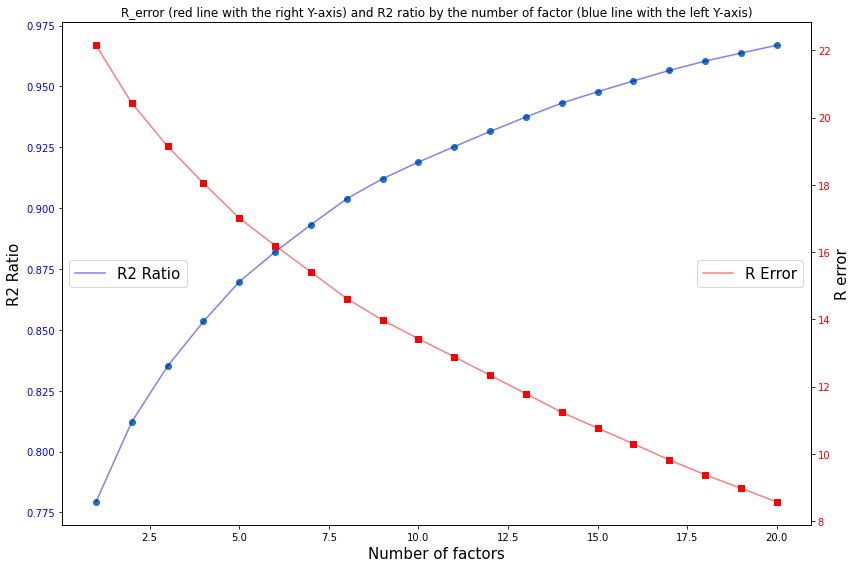

In [27]:
#그래프로 살펴본 뒤, 적절한 Rank값 설정하기
fig, ax1 = plt.subplots(figsize=(12,8))
ax1.set_title("R_error (red line with the right Y-axis) and R2 ratio by the number of factor (blue line with the left Y-axis)")
ax1.set_xlabel("Number of factors",fontsize = 15)
ax1.set_ylabel("R2 Ratio",fontsize=15)
ax1.scatter(rank_his,r2_ratio_his)
lns1 = ax1.plot(rank_his,r2_ratio_his,alpha = 0.5,color=  'blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel("R error",fontsize = 15)
ax2.scatter(rank_his,r_error_his,marker = 's',color = 'red')
lns2 = ax2.plot(rank_his,r_error_his,alpha = 0.5,color = 'red')
ax2.tick_params(axis = 'y',labelcolor = 'red')

ax1.legend(['R2 Ratio'],fontsize = 15,loc = 'center left')
ax2.legend(['R Error'],fontsize = 15,loc = 'center right')
fig.tight_layout()
plt.show()

## SELECT Optimal Rank r

In [28]:
#Select Optimal Rank r
#Suppose we choose optimal rank (그래프를 보고 결정)
optimal_rank = 10

#Do parafac2 decomposition
decomposition_opt = parafac2(t_matrix,rank = optimal_rank,return_errors = False, tol = 1e-5,n_iter_max = 500,random_state = run)
estimated_tensor = tl.parafac2_tensor.parafac2_to_tensor(decomposition_opt)
setimated_weights,(e_A,e_B,e_C) = tl.parafac2_tensor.apply_parafac2_projections(decomposition_opt)

In [29]:
#Get R^2 ratio & R_error
#||X^||^2 / ||X||^2
print("R^2 ratio : ",round((la.norm(np.concatenate([estimated_tensor[0][:108],estimated_tensor[1]],axis = 0))**2/(la.norm(np.concatenate([t_matrix[0],t_matrix[1]],axis = 0))**2)),4))
#||X-X^||
print("R_error : ",round((np.sum((t_matrix[0]-estimated_tensor[0][:108])**2) + np.sum((t_matrix[1]-estimated_tensor[1])**2))**0.5,4))

R^2 ratio :  0.919
R_error :  13.4186


## Result : Calculate Strength(Use Euclidean Distance)

In [30]:
def strength_dist(comp_B,comp_C):
    #변수는 논문 기준으로 작성
    result = []
    for idx_b in range(comp_B.shape[1]):
        one_feature = comp_B[:,idx_b]
        feature_distance = []
        for idx_c in range(comp_C.shape[1]):
            one_tensor = comp_C[:,idx_c]
            dist = la.norm(one_feature - one_tensor) #ED_str (논문 :수식 8참고)
            feature_distance.append(dist)
        result.append(feature_distance)
    result = np.array(result)
    return result

In [31]:
#Test : 논문에 나와있는 값으로 테스트(Figure 4 값을 활용)
t_a = np.array([[0.7427,10.9210,1.1229],
      [1.7622,3.5415,2.8128]])
#feaature
t_b = np.array([[1.1825,1.2220,1.7247,1.0810],
      [4.5474,1.3056,0.8986,0.5292]])
print(strength_dist(t_b,t_a))

[[ 2.81970975  9.79031241  1.73562361]
 [ 0.66197587  9.95338384  1.51045445]
 [ 1.30771899  9.56853458  2.00657043]
 [ 1.27856791 10.29075076  2.28398436]]


In [32]:
#위에서 구현한 함수를 이용하여 distance를 구하기
strength = strength_dist(e_C.T,e_A.T)

In [33]:
#make result dataframe
#51개의 feature와 위에서 구한 distance를 positive와 negative로 나누어서 최종 결과물로 만들기
df = pd.DataFrame({"feature name" : inter,"Positive": strength[:,0],"Negative" : strength[:,1],"Difference":abs(strength[:,0]-strength[:,1])})

In [34]:
df

,feature name,Positive,Negative,Difference
0,ppron,5.422774,5.275844,0.146930
1,space,2.241066,2.127144,0.113922
2,pronoun,1.969370,1.903257,0.066113
3,Social,2.361398,2.278225,0.083173
4,adverb,1.992193,1.856744,0.135448
5,conj,5.458511,5.505215,0.046704
6,cogproc,2.986015,3.149299,0.163283
7,Tone,1.567838,1.586592,0.018754
8,insight,1.928113,2.038797,0.110684
9,AllPunc,2.482613,2.609765,0.127152


In [35]:
df_static = df.describe()

In [36]:
df_static

,Positive,Negative,Difference
count,51.000000,51.000000,51.000000
mean,3.436751,3.442469,0.095055
std,1.497591,1.495580,0.055549
min,1.567838,1.586592,0.005673
25%,2.269756,2.172733,0.054016
50%,2.879526,2.746627,0.096521
75%,4.365346,4.465264,0.136162
max,6.990343,7.132357,0.220021


In [37]:
#차이가 평균+1 sigma 이상 차이나는 값을 threshold로 설정
threshold = df_static['Difference'][1]+ 1*df_static['Difference'][2]
print("Threshold : ",threshold)

Threshold :  0.15060431368131338


In [38]:
df_total = df[df['Difference'] >= threshold]

In [39]:
df_total

,feature name,Positive,Negative,Difference
6,cogproc,2.986015,3.149299,0.163283
10,Cognition,2.417010,2.592807,0.175796
15,Period,2.434701,2.602532,0.167831
16,socrefs,4.776225,4.592233,0.183992
20,Clout,6.687824,6.467804,0.220021
33,ethnicity,2.879526,2.724024,0.155502
41,i,1.903710,2.097931,0.194221
45,socbehav,3.683238,3.873971,0.190733


In [40]:
#엑셀(or csv) 파일로 저장하기
df.to_csv('final_test_2.csv',encoding ='utf8',index = False)